<a href="https://colab.research.google.com/github/Gavin-Zhao24/MIE1517-Project/blob/Test/Model2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import libraries
import os
import numpy as np
import torch
import shutil

import torchvision
from torchvision import datasets, models, transforms
import PIL
import matplotlib.pyplot as plt
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

# Raw Data Exploration

In [ ]:
# Data loading
data_dir = '/content/drive/My Drive/MIE1517 Project/Dataset for Module 1 & 2/Module2'
data_transform = transforms.Compose([transforms.ToTensor()])
raw_data = datasets.ImageFolder(data_dir, transform = data_transform)
print('Number of images: ', len(raw_data))

Number of images:  2050


In [ ]:
# Check dimensions of a single image
raw_data[1][0].shape

torch.Size([3, 623, 533])

302 320 RGB JPEG <class 'PIL.JpegImagePlugin.JpegImageFile'>


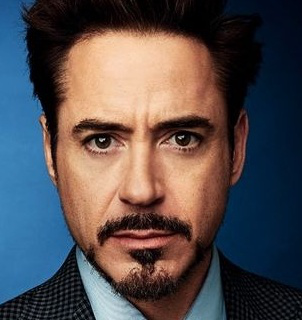

In [ ]:
im = PIL.Image.open(data_dir + '/Robert Downey Jr/Robert Downey Jr8_4304.jpg')
print(im.width, im.height, im.mode, im.format, type(im))
display(im)

In [ ]:
# Get dimensions of all images
dims = torch.tensor([raw_data[i][0].shape for i in range(len(raw_data))])
print(len(dims))

2050


In [ ]:
# Check the number of different dimensions
for i in range(3):
  unique, num = torch.unique(dims[:, i], sorted = True, return_counts = True) # Number of unique values in each dim
  print('For dim', i)
  print('Unique values: ', unique)
  print('Number of unique values: ', len(unique))
  print('Number in each unique value: ', num)
  print('\n')


For dim 0
Unique values:  tensor([3])
Number of unique values:  1
Number in each unique value:  tensor([2050])


For dim 1
Unique values:  tensor([  82,   89,   97,  105,  108,  119,  128,  129,  140,  145,  146,  152,
         154,  155,  158,  167,  168,  171,  173,  182,  183,  184,  185,  186,
         189,  190,  191,  193,  194,  196,  199,  200,  201,  202,  204,  206,
         208,  211,  213,  218,  220,  221,  223,  225,  226,  233,  235,  236,
         237,  239,  240,  241,  243,  250,  251,  256,  258,  264,  266,  268,
         270,  274,  280,  281,  284,  290,  291,  292,  293,  294,  298,  299,
         300,  304,  313,  315,  316,  320,  322,  331,  334,  336,  339,  344,
         348,  349,  350,  353,  355,  359,  360,  362,  363,  374,  375,  380,
         386,  387,  394,  398,  399,  400,  402,  404,  406,  408,  410,  420,
         421,  423,  428,  430,  435,  437,  438,  440,  448,  450,  456,  461,
         462,  463,  466,  475,  480,  482,  483,  490,  493,

# Data Preprocessing

## Data Splitting (only run once)

In [ ]:
# Split current data set into 2 folders, namely train and val

def train_val_split(classes, train_ratio = 0.8, val_ratio = 0.2):
  from_dir = '/content/drive/My Drive/MIE1517 Project/Dataset for Module 1 & 2/Module2/' # Directory of the original data
  root_dir = '/content/drive/My Drive/MIE1517 Project/Dataset for Module 1 & 2/Module2/Data Split/' # Root directory of the new arranged data 

  for cls in classes:
    class_dir = from_dir + cls # The folder to look for the images of each letter
    img_names = os.listdir(class_dir) # Get the file names of the images

    # Check if there is a train, val, and test folder and make one if not
    if os.path.isdir(root_dir + '/train//') is False:
      os.makedirs(root_dir + '/train//')
    if os.path.isdir(root_dir + '/train//' + cls) is False:
      os.makedirs(root_dir + '/train//' + cls)

    if os.path.isdir(root_dir + '/val//') is False:
      os.makedirs(root_dir + '/val//')
    if os.path.isdir(root_dir + '/val//' + cls) is False:
      os.makedirs(root_dir + '/val//' + cls)

    # Splitting the data
    train, val = np.split(img_names, [int(len(img_names)*train_ratio)])

    # Get the file names and split into each set
    train_names = [class_dir + '/' + name for name in train]
    val_names = [class_dir + '/' + name for name in val]

    print('For {}:'.format(cls))
    print('Total number of images: ', len(img_names))
    print('Total number of training images: ', len(train_names))
    print('Total number of validation images: ', len(val_names))
    print('\n')

    # Copy the images to the new folders
    for file_name in train_names:
      shutil.copy(file_name, root_dir + '/train//' + cls)
    for file_name in val_names:
      shutil.copy(file_name, root_dir + '/val//' + cls)


# Set up classes and ratios
classes = ['Anthony Mackie', 'Chris Evans', 'Chris Hemsworth', 
           'Elizabeth Olsen', 'Jeremy Renner', 'Mark Ruffalo', 
           'Robert Downey Jr', 'Scarlett Johansson', 'Tom Hiddleston',
           'Tom Holland'] # Avengers (the "well-known" ones)
train_ratio = 0.8
val_ratio = 0.2

train_val_split(classes, train_ratio, val_ratio)

For Anthony Mackie:
Total number of images:  197
Total number of training images:  157
Total number of validation images:  40


For Chris Evans:
Total number of images:  207
Total number of training images:  165
Total number of validation images:  42


For Chris Hemsworth:
Total number of images:  202
Total number of training images:  161
Total number of validation images:  41


For Elizabeth Olsen:
Total number of images:  208
Total number of training images:  166
Total number of validation images:  42


For Jeremy Renner:
Total number of images:  207
Total number of training images:  165
Total number of validation images:  42


For Mark Ruffalo:
Total number of images:  210
Total number of training images:  168
Total number of validation images:  42


For Robert Downey Jr:
Total number of images:  214
Total number of training images:  171
Total number of validation images:  43


For Scarlett Johansson:
Total number of images:  202
Total number of training images:  161
Total number of

## Data Preparation

In [ ]:
# Data loading & transformation

# Set up data directory
data_dir = '/content/drive/My Drive/MIE1517 Project/Dataset for Module 1 & 2/Module2/Data Split/'
train_dir = os.path.join(data_dir, 'train/')
val_dir = os.path.join(data_dir, 'val/')

# Ensure all images are 224 x 224 by resizing them
data_transform = transforms.Compose([transforms.Resize((224, 224)), 
                                      transforms.ToTensor()])

train_data = datasets.ImageFolder(train_dir, transform = data_transform)
val_data = datasets.ImageFolder(val_dir, transform = data_transform)

# Check number of images
print('Number of training images: ', len(train_data))
print('Number of validation images: ', len(val_data))

Number of training images:  1636
Number of validation images:  414


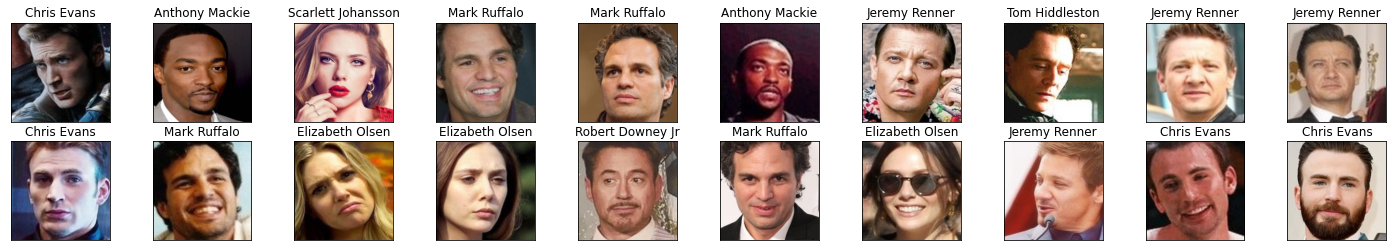

In [ ]:
# Visualize some of the training data
classes = ['Anthony Mackie', 'Chris Evans', 'Chris Hemsworth', 
           'Elizabeth Olsen', 'Jeremy Renner', 'Mark Ruffalo', 
           'Robert Downey Jr', 'Scarlett Johansson', 'Tom Hiddleston',
           'Tom Holland']
data_loader = torch.utils.data.DataLoader(train_data, batch_size = 20, shuffle = True)

# Obtain one batch of training images
dataiter = iter(data_loader)
images, labels = dataiter.next()
images = images.numpy() # Convert images to numpy for display

# Plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize = (25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks = [], yticks = [])
    plt.imshow(np.transpose(images[idx], (1, 2, 0)))
    ax.set_title(classes[labels[idx]])

# Modelling

In [ ]:
# Import NN libraries
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim 

torch.manual_seed(1) # Set the random seed

In [ ]:
# GPU
use_cuda = True 

## Model 1: Self-written model

In [ ]:
# Build model
class CNN(nn.Module):
      def __init__(self):
          super(CNN, self).__init__()
          self.name = 'CNN'
          self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 9, kernel_size = 2, stride = 2, padding = 0)
          self.pool = nn.MaxPool2d(kernel_size = 2, stride = 2)
          self.conv2 = nn.Conv2d(9, 18, 2, 2)
          self.conv3 = nn.Conv2d(18, 36, 2, 2)
          self.fc1 = nn.Linear(36*7*7, 1000)
          self.fc2 = nn.Linear(1000, 1000)
          self.fc3 = nn.Linear(1000, 10) # 10 actors/actresses

      def forward(self, x):
          x = self.pool(F.relu(self.conv1(x)))
          x = self.pool(F.relu(self.conv2(x)))
          x = self.conv3(x)
          x = x.view(-1, 36*7*7)
          x = F.relu(self.fc1(x))
          x = F.relu(self.fc2(x))
          x = self.fc3(x)
          return x

In [ ]:
def get_accuracy(model, loader, use_cuda = False):

    correct = 0
    total = 0
    for imgs, labels in loader:
        
        #############################################
        # To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
          imgs = imgs.cuda()
          labels = labels.cuda()
        #############################################

        output = model(imgs)     
        
        # Select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

In [ ]:
def check_point(name, batch_size, learning_rate, epoch):
    """ Generate a name for the model consisting of all the hyperparameter values

    Args:
        config: Configuration object containing the hyperparameters
    Returns:
        path: A string with the hyperparameter name and value concatenated
    """
    path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(name,
                                                   batch_size,
                                                   learning_rate,
                                                   epoch)
    return path

In [ ]:
def train(model, data, batch_size = 64, num_epochs = 1, learning_rate = 0.01, use_cuda = False, use_val = True):

    # Load training and validation data
    train_loader = torch.utils.data.DataLoader(data, batch_size = batch_size, shuffle = True)
    if use_val:
      val_loader = torch.utils.data.DataLoader(val_data, batch_size = batch_size, shuffle = True)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr = learning_rate)

    iters, losses, train_acc, val_acc = [], [], [], []
    
    # Training
    n = 0 # The number of iterations
    for epoch in range(num_epochs):
        correct = 0
        total = 0
        for imgs, labels in iter(train_loader):

            #############################################
            # To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
              imgs = imgs.cuda()
              labels = labels.cuda()
            #############################################
              
            out = model(imgs)             # Forward pass
            loss = criterion(out, labels) # Compute the total loss
            loss.backward()               # Backward pass (compute parameter updates)
            optimizer.step()              # Make the updates for each parameter
            optimizer.zero_grad()         # A clean up step for PyTorch

            # Save the current training information
            iters.append(n)
            losses.append(float(loss)/batch_size) # Compute *average* loss
            train_acc.append(get_accuracy(model, train_loader, use_cuda)) # Compute training accuracy
            if use_val: 
              val_acc.append(get_accuracy(model, val_loader, use_cuda))  # Compute validation accuracy
            n += 1

      # Save the current model (checkpoint) to a file every 20 epoch and final epoch
      
        if (epoch+1)%20 == 0:
          print('epoch: ', epoch+1)
          model_path = check_point(model.name, batch_size, learning_rate, epoch+1)
          torch.save(model.state_dict(), model_path)  
        elif (epoch+1) == num_epochs:
          model_path = check_point(model.name, batch_size, learning_rate, epoch+1)
          torch.save(model.state_dict(), model_path) 
          print('epoch: ', epoch+1) 
         
    # Plotting
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Train")
    if use_val:
      plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    if use_val:
      print("Final Validation Accuracy: {}".format(val_acc[-1]))

### Overfitting Test

epoch:  20
epoch:  40
epoch:  60
epoch:  80
epoch:  100


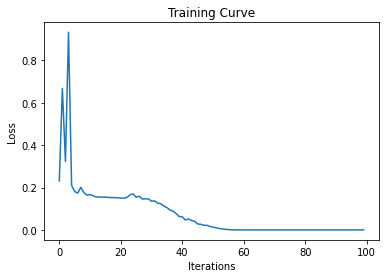

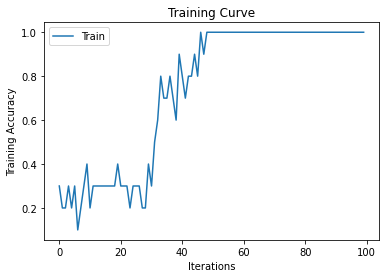

Final Training Accuracy: 1.0


In [ ]:
# Test model on a small dataset

np.random.seed(9)
data_subset = torch.utils.data.Subset(train_data, np.random.choice(len(train_data), 10, replace = False)) # Get a small set of images from training dataset

model = CNN()
if use_cuda and torch.cuda.is_available():
  model.cuda()

train(model, data_subset, batch_size = 10, num_epochs = 100, learning_rate = 0.01, use_cuda = use_cuda, use_val = False)

### Training

epoch:  20
epoch:  40
epoch:  50


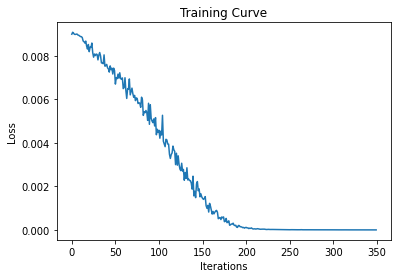

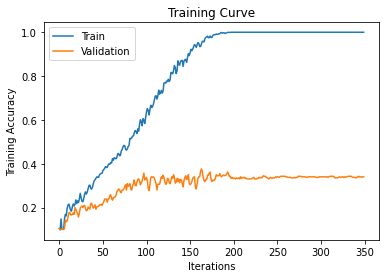

Final Training Accuracy: 1.0
Final Validation Accuracy: 0.34057971014492755


In [ ]:
# Initial
model = CNN()
if use_cuda and torch.cuda.is_available():
  model.cuda()

train(model, train_data, batch_size = 256, num_epochs = 50, learning_rate = 0.001, use_cuda = use_cuda)

epoch:  20
epoch:  40
epoch:  50


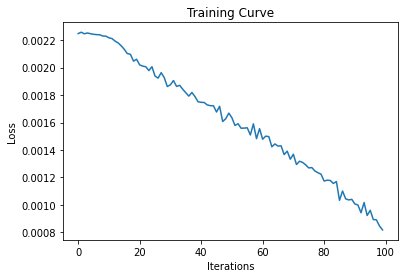

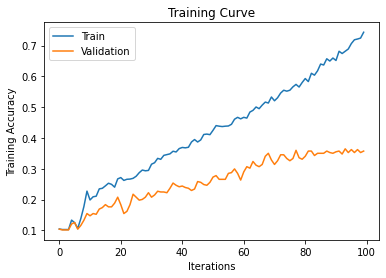

Final Training Accuracy: 0.7432762836185819
Final Validation Accuracy: 0.357487922705314


In [ ]:
# Batch size increased

model = CNN()
if use_cuda and torch.cuda.is_available():
  model.cuda()

train(model, train_data, batch_size = 1024, num_epochs = 50, learning_rate = 0.001, use_cuda = use_cuda)

In [ ]:
# Save the best model
model_1 = CNN()
model_path = check_point(model_1.name, batch_size = 1024, learning_rate = 0.001, epoch = 50)
state_1 = torch.load(model_path)
model_1.load_state_dict(state_1)

<All keys matched successfully>

## Model 2: Transfer Learning

In [ ]:
import torchvision.models

### a) AlexNet

In [ ]:
alexnet = torchvision.models.alexnet(pretrained=True)

# Compute AlexNet features

def alex_features(data, use_cuda = False):
  loader = torch.utils.data.DataLoader(data, batch_size = len(data), shuffle = True)
  dataiter = iter(loader)
  imgs, labels = dataiter.next()

  #############################################
  # To Enable GPU Usage
  if use_cuda and torch.cuda.is_available():
    imgs = imgs.cuda()
    labels = labels.cuda()
    alexnet.cuda()
  #############################################

  features = alexnet.features(imgs)
  print(features.shape, labels.shape)
  
  return features, labels

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

In [ ]:
# Compute features for training and validation data
train_features, train_labels = alex_features(train_data, use_cuda)
val_features, val_labels = alex_features(val_data, use_cuda)

torch.Size([1636, 256, 6, 6]) torch.Size([1636])
torch.Size([414, 256, 6, 6]) torch.Size([414])


In [ ]:
# Save computed features and labels
torch.save(train_features, '/content/drive/My Drive/MIE1517 Project/Dataset for Module 1 & 2/Module2/train_features_alexnet.pt')
torch.save(train_labels, '/content/drive/My Drive/MIE1517 Project/Dataset for Module 1 & 2/Module2/train_labels_alexnet.pt')

torch.save(val_features, '/content/drive/My Drive/MIE1517 Project/Dataset for Module 1 & 2/Module2/val_features_alexnet.pt')
torch.save(val_labels, '/content/drive/My Drive/MIE1517 Project/Dataset for Module 1 & 2/Module2/val_labels_alexnet.pt')

In [ ]:
# Load features
train_features = torch.load('/content/drive/My Drive/MIE1517 Project/Dataset for Module 1 & 2/Module2/train_features_alexnet.pt)
train_labels = torch.load('/content/drive/My Drive/MIE1517 Project/Dataset for Module 1 & 2/Module2/train_labels_alexnet.pt')

val_features = torch.load('/content/drive/My Drive/MIE1517 Project/Dataset for Module 1 & 2/Module2/val_features_alexnet.pt')
val_labels = torch.load('/content/drive/My Drive/MIE1517 Project/Dataset for Module 1 & 2/Module2/val_labels_alexnet.pt')

In [ ]:
def get_accuracy_class(model, feature_loader, label_loader, use_cuda = False):

    correct = 0
    total = 0
    for feats, labels in zip(feature_loader, label_loader):      
        #############################################
        # To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
          feats = feats.cuda()
          labels = labels.cuda()
        #############################################

        output = model(feats)     
        
        # Select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += feats.shape[0]
    return correct / total

In [ ]:
# Create classification model and training function

class classification(nn.Module):
      def __init__(self):
          super(classification, self).__init__()
          self.name = 'classification'
          self.fc1 = nn.Linear(256*6*6, 3000)
          self.fc2 = nn.Linear(3000, 3000)
          self.fc3 = nn.Linear(3000, 10)

      def forward(self, x):
          x = x.view(-1, 256*6*6)
          x = F.relu(self.fc1(x))
          x = F.relu(self.fc2(x))
          x = self.fc3(x)
          return x

def train_class(model, features, feat_labels, batch_size = 64, num_epochs = 1, learning_rate = 0.01, use_cuda = False, use_val = True):

    # Load training and validation data from AlexNet features output
    train_loader = torch.utils.data.DataLoader(features, batch_size = batch_size, shuffle = False)
    if use_val:
      val_loader = torch.utils.data.DataLoader(val_feats, batch_size = batch_size, shuffle = False)

    # Load training and validation labels
    train_label_loader = torch.utils.data.DataLoader(feat_labels, batch_size = batch_size, shuffle = False)
    if use_val:
      val_label_loader = torch.utils.data.DataLoader(val_labels, batch_size = batch_size, shuffle = False)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr = learning_rate)

    iters, losses, train_acc, val_acc = [], [], [], []

    # Training
    n = 0 # The number of iterations
    for epoch in range(num_epochs):                 
          for feats, labels in zip(train_loader, train_label_loader): # Get the labels and features
             
              #############################################
              # To Enable GPU Usage
              if use_cuda and torch.cuda.is_available():
                labels = labels.cuda()
                feats = feats.cuda()
              #############################################

              out = model(feats)             # Forward pass
              loss = criterion(out, labels) # Compute the total loss
              loss.backward()               # Backward pass (compute parameter updates)
              optimizer.step()              # Make the updates for each parameter
              optimizer.zero_grad()         # A clean up step for PyTorch

              # Save the current training information
              iters.append(n)
              losses.append(float(loss)/batch_size)             # Compute *average* loss     

              train_acc.append(get_accuracy_class(model, train_loader, train_label_loader, use_cuda)) # Compute training accuracy
              if use_val:
                val_acc.append(get_accuracy_class(model, val_loader, val_label_loader, use_cuda))  # Compute validation accuracy
              n += 1
              
        # Save the current model (checkpoint) to a file every 20 epoch and final epoch
        
          if (epoch+1)%20 == 0:
            print('epoch: ', epoch+1)
            model_path = check_point(model.name, batch_size, learning_rate, epoch+1)
            torch.save(model.state_dict(), model_path)  
          elif (epoch+1) == num_epochs:
            model_path = check_point(model.name, batch_size, learning_rate, epoch+1)
            torch.save(model.state_dict(), model_path) 
            print('epoch: ', epoch+1) 
          
    # Plotting
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Train")
    if use_val:
      plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    if use_val:
      print("Final Validation Accuracy: {}".format(val_acc[-1]))


In [ ]:
# Remove any possible connections to AlexNet weights
train_feats = torch.from_numpy(train_features.cpu().detach().numpy())
val_feats = torch.from_numpy(val_features.cpu().detach().numpy())

epoch:  20
epoch:  40
epoch:  50


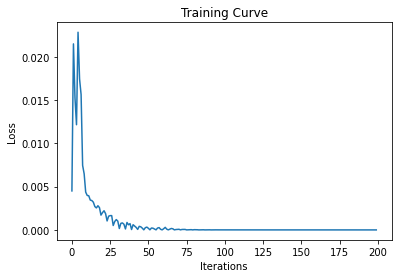

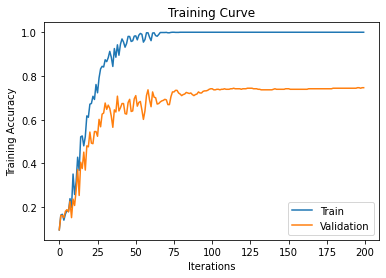

Final Training Accuracy: 1.0
Final Validation Accuracy: 0.7463768115942029


In [ ]:
# Initial
model = classification()
if use_cuda and torch.cuda.is_available():
  model.cuda()

train_class(model, train_feats, train_labels, batch_size = 512, num_epochs = 50, learning_rate = 0.001, use_cuda = use_cuda)

epoch:  20
epoch:  40
epoch:  50


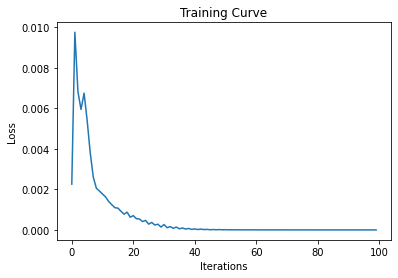

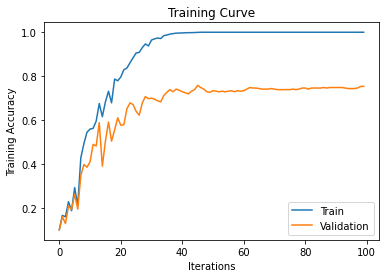

Final Training Accuracy: 1.0
Final Validation Accuracy: 0.7536231884057971


In [ ]:
# Increase batch size
model = classification()
if use_cuda and torch.cuda.is_available():
  model.cuda()

train_class(model, train_feats, train_labels, batch_size = 1024, num_epochs = 50, learning_rate = 0.001, use_cuda = use_cuda)

In [ ]:
# Save the best model
model_2a = classification()
model_path = check_point(model_2a.name, batch_size=1024, learning_rate=0.001, epoch=50)
state_2a = torch.load(model_path)
model_2a.load_state_dict(state_2a)

<All keys matched successfully>

### ~~b) ResNet18~~

In [ ]:
resnet18 = torchvision.models.resnet18(pretrained=True)

# Compute inception features
def res_features(data, use_cuda = False):
    
  feature_extract =  nn.Sequential(*list(resnet18.children())[:-1]) # Get the output right before FC layer
  loader = torch.utils.data.DataLoader(data, batch_size = len(data), shuffle = True)

  # if use_cuda and torch.cuda.is_available():
  #   features = torch.empty(1, googlenet.fc.in_features, 1, 1).cuda() # Create empty torch tensor with size of feature_extract
  #   googlenet.cuda()
  # else:
  #   features = torch.empty(1, googlenet.fc.in_features, 1, 1)

  features = torch.empty(1, resnet18.fc.in_features, 1, 1)
  for imgs, labels in loader:

    #############################################
    # To Enable GPU Usage
    if use_cuda and torch.cuda.is_available():
      imgs = imgs.cuda()
      labels = labels.cuda()
    #############################################

    features = torch.concat([features, feature_extract(imgs)], dim = 0)

  features = features[1:, :, :, :]
  print(features.shape, labels.shape)
  
  return features, labels

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [ ]:
resnet50.fc.in_features

2048

In [ ]:
# Compute features for training and validation data
train_features, train_labels = res_features(train_data, use_cuda)
val_features, val_labels = res_features(val_data, use_cuda)

In [ ]:
# Save computed features and labels
torch.save(train_features, '/content/drive/My Drive/MIE1517 Project/Dataset for Module 1 & 2/Module2/train_features_resnet.pt')
torch.save(train_labels, '/content/drive/My Drive/MIE1517 Project/Dataset for Module 1 & 2/Module2/train_labels_resnet.pt')

torch.save(val_features, '/content/drive/My Drive/MIE1517 Project/Dataset for Module 1 & 2/Module2/val_features_resnet.pt')
torch.save(val_labels, '/content/drive/My Drive/MIE1517 Project/Dataset for Module 1 & 2/Module2/val_labels_resnet.pt')

In [ ]:
# Load features
train_features = torch.load('/content/drive/My Drive/MIE1517 Project/Dataset for Module 1 & 2/Module2/train_features_resnet.pt')
train_labels = torch.load('/content/drive/My Drive/MIE1517 Project/Dataset for Module 1 & 2/Module2/train_labels_resnet.pt')

val_features = torch.load('/content/drive/My Drive/MIE1517 Project/Dataset for Module 1 & 2/Module2/val_features_resnet.pt')
val_labels = torch.load('/content/drive/My Drive/MIE1517 Project/Dataset for Module 1 & 2/Module2/val_labels_resnet.pt')

In [ ]:
# Create classification model and training function

class res_classification(nn.Module):
      def __init__(self):
          super(classification, self).__init__()
          self.name = 'res_classification'
          self.fc1 = nn.Linear(256*6*6, 3000)
          self.fc2 = nn.Linear(3000, 3000)
          self.fc3 = nn.Linear(3000, 10)

      def forward(self, x):
          x = x.view(-1, 256*6*6)
          x = F.relu(self.fc1(x))
          x = F.relu(self.fc2(x))
          x = self.fc3(x)
          return x

In [ ]:
# Remove any possible connections to AlexNet weights
train_feats = torch.from_numpy(train_features.cpu().detach().numpy())
val_feats = torch.from_numpy(val_features.cpu().detach().numpy())

epoch:  20
epoch:  40
epoch:  50


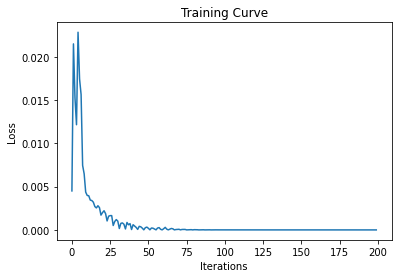

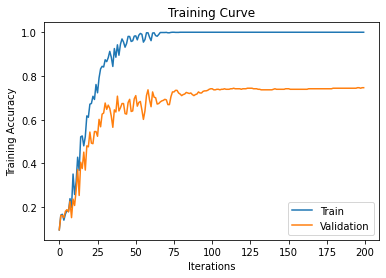

Final Training Accuracy: 1.0
Final Validation Accuracy: 0.7463768115942029


In [ ]:
# Initial
model = res_classification()
if use_cuda and torch.cuda.is_available():
  model.cuda()

train_class(model, train_feats, train_labels, batch_size = 512, num_epochs = 50, learning_rate = 0.001, use_cuda = use_cuda)

epoch:  20
epoch:  40
epoch:  50


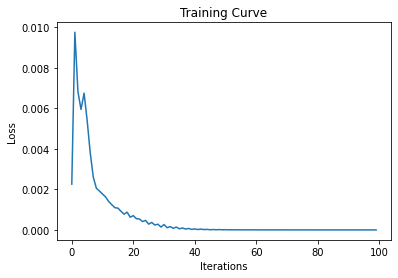

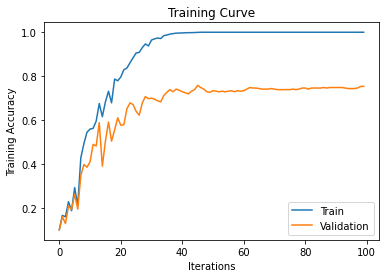

Final Training Accuracy: 1.0
Final Validation Accuracy: 0.7536231884057971


In [ ]:
# Increase batch size
model = res_classification()
if use_cuda and torch.cuda.is_available():
  model.cuda()

train_class(model, train_feats, train_labels, batch_size = 1024, num_epochs = 50, learning_rate = 0.001, use_cuda = use_cuda)

In [ ]:
# Save the best model
model_2a = classification()
model_path = check_point(model_2a.name, batch_size=1024, learning_rate=0.001, epoch=50)
state_2a = torch.load(model_path)
model_2a.load_state_dict(state_2a)

<All keys matched successfully>